### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [2]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
tf.random.set_seed(42)

import matplotlib.pyplot as plt

In [4]:
tf.__version__

'2.0.0'

### Collect Data

In [5]:
import keras

Using TensorFlow backend.


In [6]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [7]:
print(testY[0:5])

[9 2 1 1 6]


In [0]:
labels = trainY

### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [0]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY  = tf.keras.utils.to_categorical(testY, num_classes=10)

In [10]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
('First 5 examples now are: ', array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))


In [11]:
print(trainX.shape)

(60000, 28, 28)


### Visualize the data

Plot first 10 images in the triaining set and their labels.

('label for each of the below images:', array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8))


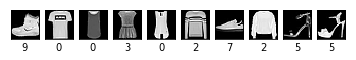

In [12]:
fig, ax = plt.subplots(1, 10)
for i, axi in enumerate(ax.flat):
    axi.imshow(trainX[i], cmap='gray')
    axi.set(xticks=[], yticks=[],
            xlabel=labels[i])
print("label for each of the below images:",labels[0:10])

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [0]:
# Initialize the sequential model
model1 = tf.keras.models.Sequential()

# Reshape data from 2D to 1D:
model1.add(tf.keras.layers.Reshape((784,), input_shape=(28,28)))

# Add Dense Layer which provides 10 Outputs after applying softmax
model1.add(tf.keras.layers.Dense(10, activation='softmax'))

# Compile the model
model1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Review the model

In [20]:
# Review the model:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


### Execute the model using model.fit()

In [21]:
# Run the model:
model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=15, batch_size=1000)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 1s 14us/sample - loss: 3923.8005 - accuracy: 0.5791 - val_loss: 1091.9013 - val_accuracy: 0.6600
Epoch 2/15
60000/60000 [==============================] - 1s 10us/sample - loss: 1750.7870 - accuracy: 0.7006 - val_loss: 827.0766 - val_accuracy: 0.7606
Epoch 3/15
60000/60000 [==============================] - 1s 10us/sample - loss: 1529.5684 - accuracy: 0.7343 - val_loss: 2378.4252 - val_accuracy: 0.7530
Epoch 4/15
60000/60000 [==============================] - 1s 10us/sample - loss: 1327.8741 - accuracy: 0.7368 - val_loss: 1015.6847 - val_accuracy: 0.7828
Epoch 5/15
60000/60000 [==============================] - 1s 10us/sample - loss: 1203.8289 - accuracy: 0.7502 - val_loss: 585.8789 - val_accuracy: 0.7711
Epoch 6/15
60000/60000 [==============================] - 1s 10us/sample - loss: 1158.3712 - accuracy: 0.7627 - val_loss: 826.9148 - val_accuracy: 0.7068
Epoch 7/15
60000/60000 

### **Inference**:
A simple neural network model with 10 neurons as specified in model1 gives an accuracy of 0.77

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [0]:
# Initialize the sequential model
model2 = tf.keras.models.Sequential()

# Reshape data from 2D to 1D:
model2.add(tf.keras.layers.Reshape((784,), input_shape=(28,28)))

# Normalize the data:
model2.add(tf.keras.layers.BatchNormalization())

# Add Dense Layer which provides 10 Outputs after applying softmax
model2.add(tf.keras.layers.Dense(10, activation='softmax'))

# Compile the model
model2.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Review the model

In [23]:
# Review the model
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 784)               3136      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                7850      
Total params: 10,986
Trainable params: 9,418
Non-trainable params: 1,568
_________________________________________________________________


### Execute the model

In [24]:
model2.fit(trainX, trainY, validation_data=(testX, testY), epochs=15, batch_size=1000)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 1s 23us/sample - loss: 1.2922 - accuracy: 0.5666 - val_loss: 1.0402 - val_accuracy: 0.6734
Epoch 2/15
60000/60000 [==============================] - 1s 16us/sample - loss: 0.7789 - accuracy: 0.7354 - val_loss: 0.7632 - val_accuracy: 0.7389
Epoch 3/15
60000/60000 [==============================] - 1s 16us/sample - loss: 0.6855 - accuracy: 0.7664 - val_loss: 0.6794 - val_accuracy: 0.7673
Epoch 4/15
60000/60000 [==============================] - 1s 16us/sample - loss: 0.6366 - accuracy: 0.7839 - val_loss: 0.6385 - val_accuracy: 0.7831
Epoch 5/15
60000/60000 [==============================] - 1s 16us/sample - loss: 0.6053 - accuracy: 0.7941 - val_loss: 0.6145 - val_accuracy: 0.7904
Epoch 6/15
60000/60000 [==============================] - 1s 15us/sample - loss: 0.5824 - accuracy: 0.8018 - val_loss: 0.5959 - val_accuracy: 0.7947
Epoch 7/15
60000/60000 [==============================] 

### **Inference**:
Model2 has given an accuracy of 0.82 after applying normalization. Accuracy increases in a steady fashion after applying normalization

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
# Initialize the sequential model
model3 = tf.keras.models.Sequential()

# Reshape data from 2D to 1D:
model3.add(tf.keras.layers.Reshape((784,), input_shape=(28,28)))

# Normalize the data:
model3.add(tf.keras.layers.BatchNormalization())

# Add Dense Layer which provides 10 Outputs after applying softmax
model3.add(tf.keras.layers.Dense(10, activation='softmax'))

# Compile the model with learning rate as 0.001
model3.compile(optimizer=tf.keras.optimizers.SGD(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

### Review the model

In [26]:
# Review the model:
model3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_4 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 784)               3136      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                7850      
Total params: 10,986
Trainable params: 9,418
Non-trainable params: 1,568
_________________________________________________________________


### Execute the model

In [27]:
# Run the model
model3.fit(trainX, trainY, validation_data=(testX, testY), epochs=15, batch_size=1000)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 1s 22us/sample - loss: 2.3090 - accuracy: 0.2584 - val_loss: 2.1280 - val_accuracy: 0.3505
Epoch 2/15
60000/60000 [==============================] - 1s 18us/sample - loss: 1.6119 - accuracy: 0.4529 - val_loss: 1.4609 - val_accuracy: 0.5074
Epoch 3/15
60000/60000 [==============================] - 1s 16us/sample - loss: 1.3259 - accuracy: 0.5503 - val_loss: 1.2399 - val_accuracy: 0.5807
Epoch 4/15
60000/60000 [==============================] - 1s 16us/sample - loss: 1.1753 - accuracy: 0.6028 - val_loss: 1.1286 - val_accuracy: 0.6227
Epoch 5/15
60000/60000 [==============================] - 1s 16us/sample - loss: 1.0806 - accuracy: 0.6343 - val_loss: 1.0565 - val_accuracy: 0.6494
Epoch 6/15
60000/60000 [==============================] - 1s 16us/sample - loss: 1.0132 - accuracy: 0.6560 - val_loss: 1.0041 - val_accuracy: 0.6674
Epoch 7/15
60000/60000 [==============================] 

### **Inference**:
Increase in Accuracy is very slow since learning rate is specified as 0.001.

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
# Initialize the sequential model
model4 = tf.keras.models.Sequential()

# Reshape data from 2D to 1D:
model4.add(tf.keras.layers.Reshape((784,), input_shape=(28,28)))

# Normalize the data:
model4.add(tf.keras.layers.BatchNormalization())


# Add 3 Dense Layers with 100,100,10 neurons: 
model4.add(tf.keras.layers.Dense(100, input_dim=784, activation='sigmoid'))  # activation = sigmoid
model4.add(tf.keras.layers.Dense(100, activation='sigmoid'))                 # activation = sigmoid
model4.add(tf.keras.layers.Dense(10, activation='softmax'))                  # activation = softmax

# Compile the model with a learning rate of 0.03:
model4.compile(optimizer=tf.keras.optimizers.SGD(lr=0.03), loss='categorical_crossentropy', metrics=['accuracy'])

## Review model

In [29]:
# Review the model
model4.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_5 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 784)               3136      
_________________________________________________________________
dense_5 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1010      
Total params: 92,746
Trainable params: 91,178
Non-trainable params: 1,568
_________________________________________________________________


### Run the model

In [30]:
# Run the model:
model4.fit(trainX, trainY, validation_data=(testX, testY), epochs=15, batch_size=1000)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 2s 31us/sample - loss: 2.2419 - accuracy: 0.2994 - val_loss: 2.1193 - val_accuracy: 0.4532
Epoch 2/15
60000/60000 [==============================] - 1s 23us/sample - loss: 2.0409 - accuracy: 0.5254 - val_loss: 1.9447 - val_accuracy: 0.6072
Epoch 3/15
60000/60000 [==============================] - 1s 23us/sample - loss: 1.8751 - accuracy: 0.5762 - val_loss: 1.7785 - val_accuracy: 0.6065
Epoch 4/15
60000/60000 [==============================] - 1s 22us/sample - loss: 1.7126 - accuracy: 0.5989 - val_loss: 1.6253 - val_accuracy: 0.6269
Epoch 5/15
60000/60000 [==============================] - 1s 23us/sample - loss: 1.5621 - accuracy: 0.6289 - val_loss: 1.4886 - val_accuracy: 0.6282
Epoch 6/15
60000/60000 [==============================] - 1s 23us/sample - loss: 1.4305 - accuracy: 0.6457 - val_loss: 1.3706 - val_accuracy: 0.6615
Epoch 7/15
60000/60000 [==============================] 

### **Inference**:
Accuracy increases steadily in model4 when 2 hidden layers and an output layer is specified

### **Summarizing overall actions**:

For all the models, 10 epochs and batch size of 1000 was used.

*   Model1 - This is a neural network model with cross entropy loss function and SGD optimizer. Output layer had 10 neurons. This model gave an accuracy of 0.77
*   Model2 - This model as same as model 1, except that batch normalization layer was added after the input layer. This model gave an accuracy of 0.82. Accuracy steadily kept increasing here.
*   Model3 - Same as model2, but this was built with a learning rate of 0.001 with SGD optimizer. Increase in accuracy is slow here since specified learning rate is small
*   Model4 - This neural network model is built with 3 Dense layers with 100, 100, 10 neurons respectively in each layer. Cross entropy loss function was used. Sigmoid was the activation in the hidden layers and softmax was used in the output layer. SGD optimizer was used with a learning rate of 0.03. This model gave an accuracy of 0.74



